**Forecast or predict the COVID-19 virus in the current Indian scenario**

Importing required libraries

In [0]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Importing Data and preprocessing

In [170]:
dataset = pd.read_csv('covid_19_clean_complete.csv')
dataset.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0


In [171]:
india_dataset = dataset.loc[dataset['Country/Region'] == 'India'].reset_index()
india_dataset.head()

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,15,NaN,India,21.0,78.0,1/22/20,0.0,0.0,0.0
1,325,NaN,India,21.0,78.0,1/23/20,0.0,0.0,0.0
2,635,NaN,India,21.0,78.0,1/24/20,0.0,0.0,0.0
3,945,NaN,India,21.0,78.0,1/25/20,0.0,0.0,0.0
4,1255,NaN,India,21.0,78.0,1/26/20,0.0,0.0,0.0


In [172]:
india_dataset.drop(['index', 'Province/State'], axis=1, inplace=True)
india_dataset.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,India,21.0,78.0,1/22/20,0.0,0.0,0.0
1,India,21.0,78.0,1/23/20,0.0,0.0,0.0
2,India,21.0,78.0,1/24/20,0.0,0.0,0.0
3,India,21.0,78.0,1/25/20,0.0,0.0,0.0
4,India,21.0,78.0,1/26/20,0.0,0.0,0.0


In [173]:
india_dataset.rename(columns={'Country/Region' : 'Country'}, inplace=True)
india_dataset.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,India,21.0,78.0,1/22/20,0.0,0.0,0.0
1,India,21.0,78.0,1/23/20,0.0,0.0,0.0
2,India,21.0,78.0,1/24/20,0.0,0.0,0.0
3,India,21.0,78.0,1/25/20,0.0,0.0,0.0
4,India,21.0,78.0,1/26/20,0.0,0.0,0.0


Confirmed Cases of Corona in INDIA

In [0]:
confirmed = india_dataset[['Date','Confirmed']]

In [175]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Visualization of Confirmed cases

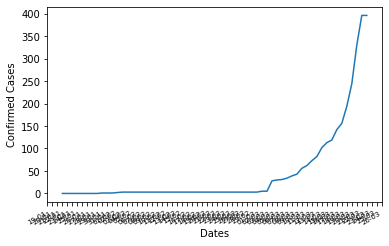

In [177]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d-%m"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(confirmed['ds'], confirmed['y'])
# plt.bar(confirmed['ds'], confirmed['y'], alpha=0.2)
plt.gcf().autofmt_xdate(bottom=0.2, rotation=30, ha='right')
plt.tick_params(axis='x', which='major', labelsize=7)
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.show()

Earlier cases

In [178]:
confirmed.head()

,ds,y
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


Recent cases

In [179]:
confirmed.tail()

,ds,y
57,2020-03-19,194.0
58,2020-03-20,244.0
59,2020-03-21,330.0
60,2020-03-22,396.0
61,2020-03-23,396.0


Prediction using Prophet

In [197]:
days_to_predict = 7
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=days_to_predict)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail(days_to_predict)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
62,2020-03-24
63,2020-03-25
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [0]:
forecast = m.predict(future)

In [199]:
forecast[['ds', 'yhat']].tail(days_to_predict)

,ds,yhat
62,2020-03-24,133.996684
63,2020-03-25,147.613725
64,2020-03-26,153.433237
65,2020-03-27,160.140437
66,2020-03-28,172.292065
67,2020-03-29,181.553191
68,2020-03-30,183.035658


Deaths due to Corona in INDIA

In [200]:
deaths = india_dataset[['Date','Deaths']]
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Visualization of Death cases

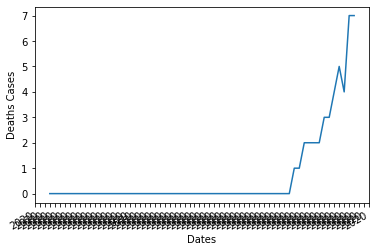

In [201]:
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(deaths['ds'], deaths['y'])
plt.gcf().autofmt_xdate(bottom=0.2, rotation=30, ha='right')
plt.xlabel('Dates')
plt.ylabel('Deaths Cases')
plt.show()

Ealier cases

In [202]:
deaths.head()

,ds,y
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


Latest Cases

In [203]:
deaths.tail()

,ds,y
57,2020-03-19,4.0
58,2020-03-20,5.0
59,2020-03-21,4.0
60,2020-03-22,7.0
61,2020-03-23,7.0


Prediction using Prophet

In [204]:
days_to_predict = 7
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=days_to_predict)
future_deaths = future.copy() # for non-baseline predictions later on
future.tail(days_to_predict)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
62,2020-03-24
63,2020-03-25
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [205]:
forecast = m.predict(future)
forecast[['ds', 'yhat']].tail(days_to_predict)

,ds,yhat
62,2020-03-24,2.180928
63,2020-03-25,2.450007
64,2020-03-26,2.561546
65,2020-03-27,2.784182
66,2020-03-28,2.673488
67,2020-03-29,3.007224
68,2020-03-30,3.007627


Recovered cases from Corona in INDIA

In [206]:
recovered = india_dataset[['Date','Recovered']]
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
recovered.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
57,2020-03-19,15.0
58,2020-03-20,20.0
59,2020-03-21,23.0
60,2020-03-22,27.0
61,2020-03-23,27.0


Visualization of Recovered cases



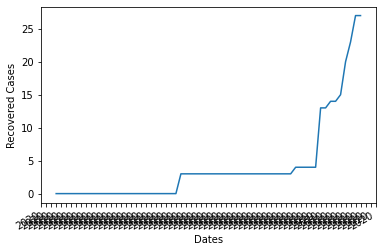

In [207]:
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(recovered['ds'], recovered['y'])
plt.gcf().autofmt_xdate(bottom=0.2, rotation=30, ha='right')
plt.xlabel('Dates')
plt.ylabel('Recovered Cases')
plt.show()

Earlier cases

In [208]:
recovered.head()

,ds,y
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


Latest cases

In [209]:
recovered.tail()

,ds,y
57,2020-03-19,15.0
58,2020-03-20,20.0
59,2020-03-21,23.0
60,2020-03-22,27.0
61,2020-03-23,27.0


Prediction using Prophet

In [210]:
days_to_predict = 7
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=days_to_predict)
future_recovered = future.copy() # for non-baseline predictions later on
future.tail(days_to_predict)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
62,2020-03-24
63,2020-03-25
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [211]:
forecast = m.predict(future)
forecast[['ds', 'yhat']].tail(days_to_predict)

,ds,yhat
62,2020-03-24,11.687738
63,2020-03-25,12.235008
64,2020-03-26,12.347317
65,2020-03-27,12.904069
66,2020-03-28,13.238538
67,2020-03-29,15.017417
68,2020-03-30,15.018436


The End